Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'Longitude', 'Latitude', 'long_lat', 'txn_description',
       'merchant_id', 'merchant_code', 'first_name', 'balance', 'date',
       'week day', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'Hour', 'Hour1', 'amount', 'transaction_id',
       'Transaction values', 'country', 'customer_id', 'm_longitude',
       'm_latitude', 'merchant_long_lat', 'movement'],
      dtype='object')

In [2]:
df = df_0.copy()
df['customer_id'].dropna(inplace = True)
Salary_df= df[df['txn_description'] == 'PAY/SALARY'] #This is the initial dataset that contains only the PAY/SALARY description
print(len(Salary_df['customer_id'].unique())) #All of our customers have salary transactions in our data set. 
Salary_df.reset_index(inplace = True)
Salary_df.drop('index',axis = 1, inplace = True)
date1= []
for i in range(len(Salary_df)):
    date1.append(Salary_df['date'][i][3:5])
Salary_df['month'] = date1
#----------------------------------------------------------------------------
print(len(Salary_df[Salary_df['month'] == '08'])) #We need to know if there are 100 unique customers_ids by month
print(len(Salary_df[Salary_df['month'] == '09']))
print(len(Salary_df[Salary_df['month'] == '10']))

print(len(Salary_df['customer_id'][Salary_df['month'] == '08'].unique())) #I want to know if all the customers have salary transactions each month
print(len(Salary_df['customer_id'][Salary_df['month'] == '09'].unique()))
print(len(Salary_df['customer_id'][Salary_df['month'] == '10'].unique()))
#-----------------------------------------------------------------------------
Qsalary = Salary_df[['customer_id','amount']].groupby('customer_id').sum()
#Qsalary.reset_index(inplace = True)
Qsalary.columns = ['QS']
Qsalary['AS'] = 4*Qsalary['QS'] #The annual salary column
Qsalary.head()


100
298
272
313
98
99
99


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,QS,AS
customer_id,,
CUS-1005756958,12616.11,50464.44
CUS-1117979751,25050.55,100202.20
CUS-1140341822,11499.06,45996.24
CUS-1147642491,22248.07,88992.28
CUS-1196156254,27326.11,109304.44


In [3]:

#-----------------------------------------------------------------------------
df_age = Salary_df[['customer_id','age']].groupby('customer_id').mean()
#df_age.reset_index(inplace = True)
df_age.columns = ['age']
Qsalary = Qsalary.join(df_age)
#-----------------------------------------------------------------------------
print('There are', len(df['customer_id'][df['txn_description'] == 'POS'].unique()), 'unique customers of POS transactions')
print('There are', len(df['customer_id'][df['txn_description'] == 'SALES-POS'].unique()), 'unique customers of SALES-POS transactions')
print('There are', len(df['customer_id'][df['txn_description'] == 'PAYMENT'].unique()), 'unique customers of PAYMENT transactions')
print('There are', len(df['customer_id'][df['txn_description'] == 'INTER BANK'].unique()), 'unique customers of INTER BANK transactions')
print('There are', len(df['customer_id'][df['txn_description'] == 'PHONE BANK'].unique()), 'unique customers of PHONE BANK transactions')
#------------------------------------------------------------------------------
df_aws = df[['customer_id','amount']][df['txn_description']!= 'PAY/SALARY'].groupby('customer_id').sum()
#df_aws.reset_index(inplace = True)
df_aws.columns = ['Total amount - salary']
Qsalary = Qsalary.join(df_aws)
#--------------------------------------------------------------------------------
df_trans = df[['customer_id','Transaction values']][df['txn_description']!= 'PAY/SALARY'].groupby('customer_id').sum()
#df_trans.reset_index(inplace = True)
df_trans.columns = ['Total transactions - salary t.']
Qsalary = Qsalary.join(df_trans)
#------------------------------------------------------------------------------
df['gender'].replace({'M':1, 'F':0},inplace = True)
#-----------------------------------------------------------------------------
df_gender = df[['customer_id','gender']].groupby('customer_id').mean()
#df_gender.reset_index(inplace = True)
Qsalary = Qsalary.join(df_gender)
#----------------------------------------------------------------------------
df_payment = df[['customer_id','amount']][df['txn_description'] == 'PAYMENT'].groupby('customer_id').sum()
#df_payment.reset_index(inplace = True)
df_payment.columns = ['Total_amount_PT']
Qsalary = Qsalary.join(df_payment)
#---------------------------------------------------------------------------
df_pos = df[['customer_id','amount']][df['txn_description'] == 'POS'].groupby('customer_id').sum()
#df_pos.reset_index(inplace = True)
df_pos.columns = ['Total_amount_PosT']
Qsalary = Qsalary.join(df_pos)
#---------------------------------------------------------------------------
Qsalary1 = Qsalary.copy()
#---------------------------------------------------------------------------
df_Sp = df[['customer_id','amount']][df['txn_description'] == 'SALES-POS'].groupby('customer_id').sum()
df_Sp.columns = ['Total_amount_SpT']
Qsalary1 = Qsalary1.join(df_Sp)
#Qsalary1.set_index('customer_id', inplace = True)
#Qsalary1 = Qsalary1.join(df_Sp)
#Qsalary1.reset_index(inplace = True)
Qsalary1['Total_amount_SpT'].fillna(0, inplace = True)
#----------------------------------------------------------------------------
df_credit = df[['customer_id','Transaction values']][df['movement'] == 'credit'].groupby('customer_id').sum()
#df_credit.reset_index(inplace = True)
df_credit.columns = ['Total credit T']
Qsalary1 = Qsalary1.join(df_credit)
#-----------------------------------------------------------------------------
df_debit = df[['customer_id','Transaction values']][df['movement'] == 'debit'].groupby('customer_id').sum()
#df_debit.reset_index(inplace = True)
df_debit.columns = ['Total debit T']
Qsalary1 = Qsalary1.join(df_debit)
#-----------------------------------------------------------------------------
df_avws = df[['customer_id','amount']][df['txn_description']!= 'PAY/SALARY'].groupby('customer_id').mean()
#df_avws.reset_index(inplace = True)
df_avws.columns = ['average amount ws']
Qsalary1 = Qsalary1.join(df_avws)
#------------------------------------------------------------------------------
df_location = Salary_df[['customer_id','Latitude','Longitude']].groupby('customer_id').mean()
#df_location.reset_index(inplace = True)
Qsalary1 = Qsalary1.join(df_location)

#-----------------------------------------------------------------------------
df_balance = Salary_df[['customer_id','balance']].groupby('customer_id').sum()
#df_balance.reset_index(inplace = True)
df_balance.columns = ['Balance_sum_ST']
Qsalary1 = Qsalary1.join(df_balance)
#--------------------------------------------------------------------------------
df_balance = Salary_df[['customer_id','balance']].groupby('customer_id').mean()
#df_balance.reset_index(inplace = True)
df_balance.columns = ['Balance_avg_ST']
Qsalary1 = Qsalary1.join(df_balance)
#------------------------------------------------------------------------------
df_TT = df[['customer_id','Transaction values']].groupby('customer_id').sum()
#df_TT.reset_index(inplace = True)
df_TT.columns = ['Total transactions'] 
Qsalary1 = Qsalary1.join(df_TT)
#---------------------------------------------------------------------------
Qsalary1['A expenses'] = 4* Qsalary1['Total amount - salary']
#---------------------------------------------------------------------------
Qsalary1['A payment amount'] = 4* Qsalary1['Total_amount_PT']
#---------------------------------------------------------------------------
Qsalary1['A incomes - expenses'] = Qsalary1['AS'] - Qsalary1['A expenses']





There are 100 unique customers of POS transactions
There are 99 unique customers of SALES-POS transactions
There are 100 unique customers of PAYMENT transactions
There are 68 unique customers of INTER BANK transactions
There are 16 unique customers of PHONE BANK transactions


In [4]:
Qsalary1.head()

,QS,AS,age,Total amount - salary,Total transactions - salary t.,gender,Total_amount_PT,Total_amount_PosT,Total_amount_SpT,Total credit T,Total debit T,average amount ws,Latitude,Longitude,Balance_sum_ST,Balance_avg_ST,Total transactions,A expenses,A payment amount,A incomes - expenses
customer_id,,,,,,,,,,,,,,,,,,,,
CUS-1005756958,12616.11,50464.44,53.0,3652.86,60.0,0.0,1296.0,748.01,1062.85,13.0,60.0,60.881000,-27.51,153.03,61342.65,4718.665385,73.0,14611.44,5184.0,35853.00
CUS-1117979751,25050.55,100202.20,21.0,8933.82,93.0,1.0,3957.0,606.37,3369.45,7.0,93.0,96.062581,-31.82,115.81,83700.42,11957.202857,100.0,35735.28,15828.0,64466.92
CUS-1140341822,11499.06,45996.24,28.0,5511.54,74.0,1.0,852.0,1356.47,3033.07,6.0,74.0,74.480270,-37.42,144.97,35050.32,5841.720000,80.0,22046.16,3408.0,23950.08
CUS-1147642491,22248.07,88992.28,34.0,6732.75,105.0,0.0,2597.0,2062.31,1823.44,13.0,105.0,64.121429,-33.77,151.04,114575.08,8813.467692,118.0,26931.00,10388.0,62061.28
CUS-1196156254,27326.11,109304.44,34.0,8724.61,238.0,0.0,3017.0,2305.65,2634.96,7.0,238.0,36.658025,-35.01,138.52,166920.02,23845.717143,245.0,34898.44,12068.0,74406.00


In [5]:
len(Qsalary1)

100

In [6]:
Qsalary1.corr()[1:2]

,QS,AS,age,Total amount - salary,Total transactions - salary t.,gender,Total_amount_PT,Total_amount_PosT,Total_amount_SpT,Total credit T,Total debit T,average amount ws,Latitude,Longitude,Balance_sum_ST,Balance_avg_ST,Total transactions,A expenses,A payment amount,A incomes - expenses
AS,1.0,1.0,-0.036504,0.373477,0.098381,0.102226,0.630678,-0.069307,0.125583,0.033301,0.098381,0.145541,0.107254,-0.034554,0.217715,0.198755,0.099279,0.373477,0.630678,0.921788


<IPython.core.display.Javascript object>


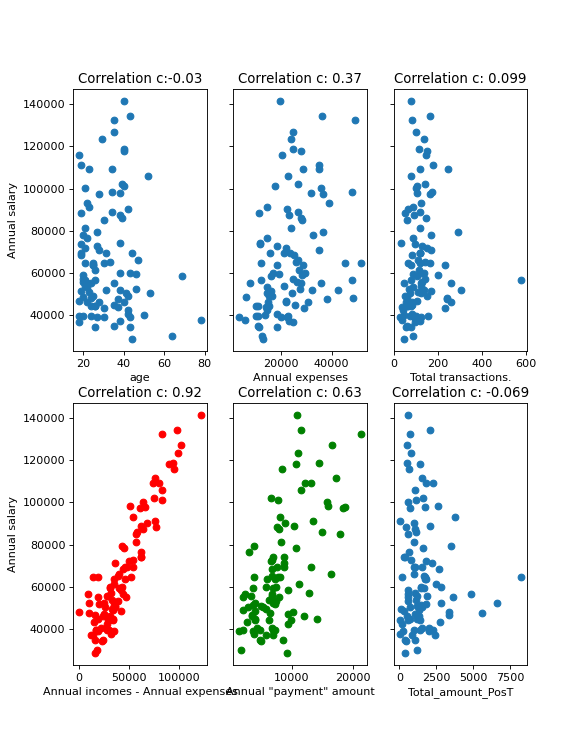

Text(0.5, 0, 'Total_amount_PosT')

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, sharex=False, sharey=True)
ax1.plot(Qsalary1['age'],Qsalary1['AS'], 'o')
ax1.set_title('Correlation c:-0.03')
ax1.set_ylabel('Annual salary')
ax1.set_xlabel('age')
#----------------------------------
ax2.plot(Qsalary1['A expenses'],Qsalary1['AS'], 'o')
ax2.set_title('Correlation c: 0.37')
ax2.set_xlabel('Annual expenses')
#---------------------------------
ax3.plot(Qsalary1['Total transactions'],Qsalary1['AS'], 'o')
ax3.set_title('Correlation c: 0.099')
ax3.set_xlabel('Total transactions.')
#---------------------------------
ax4.plot(Qsalary1['A incomes - expenses'],Qsalary1['AS'], 'o', color = 'red')
ax4.set_title('Correlation c: 0.92')
ax4.set_xlabel('Annual incomes - Annual expenses')
ax4.set_ylabel('Annual salary')
#---------------------------------
ax5.plot(Qsalary1['A payment amount'],Qsalary1['AS'], 'o',color = 'green')
ax5.set_title('Correlation c: 0.63')
ax5.set_xlabel('Annual "payment" amount')
#---------------------------------
ax6.plot(Qsalary1['Total_amount_PosT'],Qsalary1['AS'], 'o')
ax6.set_title('Correlation c: -0.069')
ax6.set_xlabel('Total_amount_PosT')
#---------------------------------



## Linear regression model

In [8]:
LR_df = Qsalary1[['A incomes - expenses','Total_amount_PT','AS']]
X = LR_df[['A incomes - expenses','Total_amount_PT']]
y = LR_df['AS']
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
Linear_model = LinearRegression().fit(X_train,y_train)
#print('linear model coeff (w): {}'
     #.format(Linear_model.coef_))
#print('linear model intercept (b): {:.3f}'
     #.format(Linear_model.intercept_))
print('Annual salary regression model')
print('Accuracy of linear regression model on training set: {:.3f}'
     .format(Linear_model.score(X_train, y_train)))
print('Accuracy of linear regression model on test set: {:.3f}'
     .format(Linear_model.score(X_test, y_test)))


Annual salary regression model
Accuracy of linear regression model on training set: 0.884
Accuracy of linear regression model on test set: 0.891


## Regression with Decision Tree

In [9]:
DT_df = Qsalary1[['A incomes - expenses','Total_amount_PT','AS']]
#binned = pd.cut(DT_df['AS'], bins = [0,23000,90800,405000,1000000],
                #labels = ['L','L-M','M-H','H'] )
#DT_df['AS_b'] = binned

X = DT_df[['A incomes - expenses','Total_amount_PT']]
y = DT_df['AS']

from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 0)

clf = DecisionTreeRegressor(max_depth = 4,
                            min_samples_leaf = 8,random_state 
                            = 0).fit(X_train, y_train)
print('Annual salary decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Annual salary decision tree
Accuracy of DT classifier on training set: 0.89
Accuracy of DT classifier on test set: 0.84


<IPython.core.display.Javascript object>


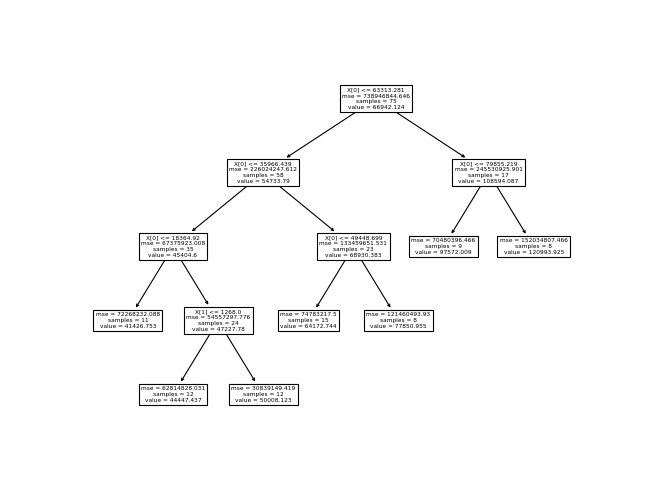

[Text(293.0909090909091, 332.64, 'X[0] <= 63313.281\nmse = 738946844.646\nsamples = 75\nvalue = 66942.124'),
 Text(180.36363636363637, 258.71999999999997, 'X[0] <= 35966.439\nmse = 226024247.612\nsamples = 58\nvalue = 54733.79'),
 Text(90.18181818181819, 184.8, 'X[0] <= 18364.92\nmse = 67375923.008\nsamples = 35\nvalue = 45404.6'),
 Text(45.09090909090909, 110.88, 'mse = 72268232.088\nsamples = 11\nvalue = 41426.753'),
 Text(135.27272727272728, 110.88, 'X[1] <= 1268.0\nmse = 54557297.776\nsamples = 24\nvalue = 47227.78'),
 Text(90.18181818181819, 36.960000000000036, 'mse = 62814828.031\nsamples = 12\nvalue = 44447.437'),
 Text(180.36363636363637, 36.960000000000036, 'mse = 30839149.419\nsamples = 12\nvalue = 50008.123'),
 Text(270.54545454545456, 184.8, 'X[0] <= 49448.699\nmse = 133459651.531\nsamples = 23\nvalue = 68930.383'),
 Text(225.45454545454547, 110.88, 'mse = 74783217.5\nsamples = 15\nvalue = 64172.744'),
 Text(315.6363636363636, 110.88, 'mse = 121460493.93\nsamples = 8\nvalue

In [12]:
from sklearn import tree
plt.figure()
tree.plot_tree(clf)